In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')
from statsmodels.tools.eval_measures import rmse, aic
from tensorflow import keras
from tensorflow.keras import layers

from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error


In [2]:
df = pd.read_csv("C:/Users/adiza/OneDrive/Computer Science/Projects/DS Final Project/insight/data/DF_Daily_Time_Series.csv")
df.reset_index(drop=True)

date  position                        title  \
0       1990-01-06         1      Another Day In Paradise   
1       1990-01-06         2                Rhythm Nation   
2       1990-01-06         3              Don't Know Much   
3       1990-01-06         4              Pump Up The Jam   
4       1990-01-06         5  With Every Beat Of My Heart   
...            ...       ...                          ...   
159032  2021-02-13        96                    Fake Woke   
159033  2021-02-13        97                     Prisoner   
159034  2021-02-13        98                    Dangerous   
159035  2021-02-13        99                Almost Maybes   
159036  2021-02-13       100                Mr. Right Now   

                                          artist              spotify_id  \
0                                   Phil Collins  1NCuYqMc8hKMb4cpNTcJbD   
1                                  Janet Jackson  4nTYxxF8iWBq54LO3dBUie   
2       Linda Ronstadt (Featuring Aaron Neville)  35iKfvnDtZezUzd8NlcfGe   
3                   Technotronic Featuring Felly  21qnJAMtzC6S5SESuqQLEK   
4                                   Taylor Dayne  3hK26G5cYhJ9KjcUy1aBRk   
...                                          ...                     ...   
159032                             Tom MacDonald  22N2WWWq3pGweYgP5o5q7w   
159033            Miley Cyrus Featuring Dua Lipa  22N2WWWq3pGweYgP5o5q7w   
159034                             Morgan Wallen  22N2WWWq3pGweYgP5o5q7w   
159035                              Jordan Davis  22N2WWWq3pGweYgP5o5q7w   
159036  21 Savage & Metro Boomin Featuring Drake  22N2WWWq3pGweYgP5o5q7w   

        is_new  last_pos  peak_pos  weeks  danceability  ...       key  \
0        False         1         1     10         0.780  ...  0.272727   
1        False         4         2      9         0.633  ...  0.090909   
2        False         2         2     15         0.719  ...  1.000000   
3        False         7         4     13         0.885  ...  0.909091   
4        False         5         5     12         0.773  ...  0.454545   
...        ...       ...       ...    ...           ...  ...       ...   
159032    True         0        96      1         0.661  ...  0.727273   
159033   False        81        54     11         0.781  ...  0.272727   
159034   False         0        62      3         0.635  ...  0.636364   
159035   False         0        95      2         0.582  ...  1.000000   
159036   False        80        10     18         0.647  ...  0.454545   

        loudness  mode  speechiness  acousticness  instrumentalness  liveness  \
0       0.754311     0       0.0306        0.7360          0.002690    0.0630   
1       0.740149     1       0.0686        0.0504          0.109000    0.3750   
2       0.474726     1       0.0404        0.3350          0.537000    0.0638   
3       0.691864     0       0.0733        0.0147          0.000004    0.0494   
4       0.837966     1       0.0340        0.0827          0.000002    0.0984   
...          ...   ...          ...           ...               ...       ...   
159032  0.771193     1       0.1330        0.0971          0.000000    0.1270   
159033  0.866026     0       0.0452        0.0103          0.000000    0.0761   
159034  0.836098     1       0.0279        0.2160          0.000000    0.2850   
159035  0.865535     1       0.0522        0.1460          0.000000    0.1030   
159036  0.811906     1       0.3040        0.2310          0.000000    0.1330   

        valence     tempo  month_year  
0         0.365  0.322684     1990-01  
1         0.676  0.366006     1990-01  
2         0.272  0.479302     1990-01  
3         0.715  0.459850     1990-01  
4         0.971  0.440264     1990-01  
...         ...       ...         ...  
159032    0.158  0.249802     2021-02  
159033    0.595  0.480381     2021-02  
159034    0.948  0.426005     2021-02  
159035    0.555  0.250801     2021-02  
159036    0.704  0.747562     2021-02  

[159037 rows x 21 columns

In [3]:
fixed_df = df.drop(columns=["title", "artist","spotify_id","is_new","last_pos","position","key","instrumentalness"])
fixed_df = fixed_df.loc[fixed_df["peak_pos"] < 25]
fixed_df = fixed_df.loc[fixed_df["weeks"] > 5].groupby('month_year').mean()
fixed_df = fixed_df.drop(columns=["peak_pos", "weeks"])
fixed_df

danceability    energy  loudness      mode  speechiness  \
month_year                                                            
1990-01         0.630260  0.665077  0.688201  0.650888     0.055056   
1990-02         0.645926  0.666276  0.692767  0.736196     0.057111   
1990-03         0.650222  0.652237  0.682651  0.762887     0.056255   
1990-04         0.630709  0.669716  0.690572  0.738806     0.053413   
1990-05         0.637906  0.661852  0.696228  0.710938     0.060371   
...                  ...       ...       ...       ...          ...   
2020-10         0.694059  0.653637  0.790261  0.495098     0.130855   
2020-11         0.686750  0.667058  0.792962  0.448718     0.134620   
2020-12         0.650519  0.595080  0.745870  0.549383     0.103267   
2021-01         0.672920  0.599441  0.760942  0.521277     0.111684   
2021-02         0.683030  0.611791  0.773716  0.492537     0.118903   

            acousticness  liveness   valence     tempo  
month_year                                              
1990-01         0.165226  0.162822  0.586083  0.412984  
1990-02         0.163809  0.171035  0.597663  0.417995  
1990-03         0.161965  0.159654  0.571773  0.406299  
1990-04         0.159603  0.158996  0.600575  0.430845  
1990-05         0.174774  0.172884  0.600820  0.407230  
...                  ...       ...       ...       ...  
2020-10         0.173218  0.172858  0.480221  0.459309  
2020-11         0.173840  0.174962  0.483581  0.472702  
2020-12         0.320473  0.167510  0.573328  0.458979  
2021-01         0.302343  0.143945  0.556306  0.461896  
2021-02         0.281510  0.148919  0.525915  0.441954  

[374 rows x 9 columns]

In [4]:
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [5]:
values = fixed_df.values
# frame as supervised learning
reframed = series_to_supervised(values, 1, 1)
# drop columns we don't want to predict
reframed.head()

var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)  var6(t-1)  \
1   0.630260   0.665077   0.688201   0.650888   0.055056   0.165226   
2   0.645926   0.666276   0.692767   0.736196   0.057111   0.163809   
3   0.650222   0.652237   0.682651   0.762887   0.056255   0.161965   
4   0.630709   0.669716   0.690572   0.738806   0.053413   0.159603   
5   0.637906   0.661852   0.696228   0.710938   0.060371   0.174774   

   var7(t-1)  var8(t-1)  var9(t-1)   var1(t)   var2(t)   var3(t)   var4(t)  \
1   0.162822   0.586083   0.412984  0.645926  0.666276  0.692767  0.736196   
2   0.171035   0.597663   0.417995  0.650222  0.652237  0.682651  0.762887   
3   0.159654   0.571773   0.406299  0.630709  0.669716  0.690572  0.738806   
4   0.158996   0.600575   0.430845  0.637906  0.661852  0.696228  0.710938   
5   0.172884   0.600820   0.407230  0.645397  0.665467  0.690983  0.684783   

    var5(t)   var6(t)   var7(t)   var8(t)   var9(t)  
1  0.057111  0.163809  0.171035  0.597663  0.417995  
2  0.056255  0.161965  0.159654  0.571773  0.406299  
3  0.053413  0.159603  0.158996  0.600575  0.430845  
4  0.060371  0.174774  0.172884  0.600820  0.407230  
5  0.058120  0.146075  0.174268  0.602620  0.387812

In [6]:
# split into train and test sets
values = reframed.values
n_train_months = reframed.shape[0]-3
train = values[:n_train_months, :]
test = values[n_train_months:, :]
# split into input and outputs
train_X, train_y = train[:, :-9], train[:,9:]
test_X, test_y = test[:, :-9], test[:, 9:]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(370, 1, 9) (370, 9) (3, 1, 9) (3, 9)


In [7]:
train

array([[0.63026036, 0.66507692, 0.68820141, ..., 0.17103497, 0.59766258,
        0.41799541],
       [0.64592638, 0.66627607, 0.69276747, ..., 0.15965361, 0.5717732 ,
        0.40629879],
       [0.65022165, 0.65223711, 0.68265124, ..., 0.15899627, 0.60057463,
        0.43084519],
       ...,
       [0.70558382, 0.62439306, 0.7892036 , ..., 0.18993038, 0.49100696,
        0.42418909],
       [0.69196203, 0.63072152, 0.79154734, ..., 0.17285784, 0.48022059,
        0.45930876],
       [0.69405882, 0.65363725, 0.79026145, ..., 0.17496154, 0.48358077,
        0.47270244]])

In [8]:
hidden_nodes = int(train_X.shape[0]/10 * ( train_X.shape[2]* train_X.shape[2]))
hidden_nodes

2997

Epoch 1/12
7/7 - 4s - loss: 0.4298 - val_loss: 0.4035
Epoch 2/12
7/7 - 0s - loss: 0.3987 - val_loss: 0.3728
Epoch 3/12
7/7 - 0s - loss: 0.3654 - val_loss: 0.3357
Epoch 4/12
7/7 - 0s - loss: 0.3271 - val_loss: 0.2981
Epoch 5/12
7/7 - 0s - loss: 0.2865 - val_loss: 0.2523
Epoch 6/12
7/7 - 0s - loss: 0.2398 - val_loss: 0.1972
Epoch 7/12
7/7 - 0s - loss: 0.1880 - val_loss: 0.1425
Epoch 8/12
7/7 - 0s - loss: 0.1404 - val_loss: 0.0920
Epoch 9/12
7/7 - 0s - loss: 0.0899 - val_loss: 0.0684
Epoch 10/12
7/7 - 0s - loss: 0.0564 - val_loss: 0.0699
Epoch 11/12
7/7 - 0s - loss: 0.0452 - val_loss: 0.0565
Epoch 12/12
7/7 - 0s - loss: 0.0343 - val_loss: 0.0503


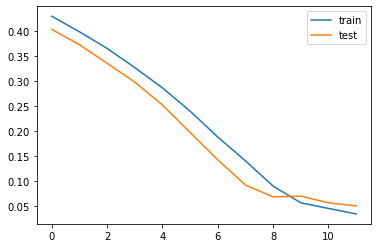

In [9]:
# design network
model = keras.Sequential()
model.add(layers.LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2]))) #input_shape=(timesteps, features)
model.add(layers.Dense(9))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(train_X, train_y, epochs=12, batch_size=60, validation_data=(test_X, test_y), verbose=2, shuffle=False)
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 50)                12000     
_________________________________________________________________
dense (Dense)                (None, 9)                 459       
Total params: 12,459
Trainable params: 12,459
Non-trainable params: 0
_________________________________________________________________


In [11]:
type(test_X)

numpy.ndarray

In [12]:
yhat = model.predict(test_X)
rmse = sqrt(mean_squared_error(yhat, test_y))
rmse

0.06695134248241932

In [13]:
type(df.values[-1])

numpy.ndarray

In [14]:
yhat = pd.DataFrame(yhat)
yhat

0         1         2         3         4         5         6  \
0  0.667230  0.661166  0.808208  0.630780  0.101789  0.171847  0.173422   
1  0.683731  0.665492  0.818382  0.643725  0.102006  0.179099  0.176553   
2  0.681209  0.667351  0.815727  0.641056  0.104566  0.177067  0.175686   

          7         8  
0  0.518639  0.421608  
1  0.533394  0.432991  
2  0.532096  0.432289

In [15]:
test_y = pd.DataFrame(test_y)
test_y

0         1         2         3         4         5         6  \
0  0.650519  0.595080  0.745870  0.549383  0.103267  0.320473  0.167510   
1  0.672920  0.599441  0.760942  0.521277  0.111684  0.302343  0.143945   
2  0.683030  0.611791  0.773716  0.492537  0.118903  0.281510  0.148919   

          7         8  
0  0.573328  0.458979  
1  0.556306  0.461896  
2  0.525915  0.441954

### future forecasts

In [16]:
new_model = keras.Sequential()
new_model.add(layers.LSTM(50, stateful=True, batch_input_shape=(1,train_X.shape[1], train_X.shape[2])))
new_model.add(layers.Dense(9))
new_model.compile(loss='mae', optimizer='adam')

In [17]:
new_model.set_weights(model.get_weights())
new_model.reset_states()

In [18]:
df_lstm_results_f = pd.DataFrame()
data = fixed_df.copy()

for time in range(3):
    values = data.values
    reframed = series_to_supervised(values,1, 1)
    ref_values = reframed.values
    t = ref_values[-1:, -9:]
    t = t.reshape((1, 1, 9))
    prediction = new_model.predict([t])
    p = pd.DataFrame(prediction, columns = data.columns )
    data = pd.concat([data, p])
    df_lstm_results_f = pd.concat([df_lstm_results_f, p])

df_lstm_results_f.columns = data.columns
data

danceability    energy  loudness      mode  speechiness  \
1990-01      0.630260  0.665077  0.688201  0.650888     0.055056   
1990-02      0.645926  0.666276  0.692767  0.736196     0.057111   
1990-03      0.650222  0.652237  0.682651  0.762887     0.056255   
1990-04      0.630709  0.669716  0.690572  0.738806     0.053413   
1990-05      0.637906  0.661852  0.696228  0.710938     0.060371   
...               ...       ...       ...       ...          ...   
2021-01      0.672920  0.599441  0.760942  0.521277     0.111684   
2021-02      0.683030  0.611791  0.773716  0.492537     0.118903   
0            0.676006  0.661999  0.809689  0.634519     0.104051   
0            1.070968  1.062803  1.265170  0.989906     0.151925   
0            1.598436  1.615783  1.906702  1.477726     0.228435   

         acousticness  liveness   valence     tempo  
1990-01      0.165226  0.162822  0.586083  0.412984  
1990-02      0.163809  0.171035  0.597663  0.417995  
1990-03      0.161965  0.159654  0.571773  0.406299  
1990-04      0.159603  0.158996  0.600575  0.430845  
1990-05      0.174774  0.172884  0.600820  0.407230  
...               ...       ...       ...       ...  
2021-01      0.302343  0.143945  0.556306  0.461896  
2021-02      0.281510  0.148919  0.525915  0.441954  
0            0.177196  0.175275  0.525300  0.428372  
0            0.257786  0.312741  0.873455  0.677654  
0            0.353982  0.480244  1.361522  1.030115  

[377 rows x 9 columns]

In [19]:
df_lstm_results_f

danceability    energy  loudness      mode  speechiness  acousticness  \
0      0.676006  0.661999  0.809689  0.634519     0.104051      0.177196   
0      1.070968  1.062803  1.265170  0.989906     0.151925      0.257786   
0      1.598436  1.615783  1.906702  1.477726     0.228435      0.353982   

   liveness   valence     tempo  
0  0.175275  0.525300  0.428372  
0  0.312741  0.873455  0.677654  
0  0.480244  1.361522  1.030115

In [20]:
p

danceability    energy  loudness      mode  speechiness  acousticness  \
0      1.598436  1.615783  1.906702  1.477726     0.228435      0.353982   

   liveness   valence     tempo  
0  0.480244  1.361522  1.030115

In [21]:
def forecast_accuracy(forecast, actual):
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    return({'rmse':rmse, 'corr':corr})
def adjust(val, length= 6): return str(val).ljust(length)

In [22]:
print('\nForecast Accuracy of: danceability')
accuracy_prod = forecast_accuracy(yhat[0].values, test_y[0])
for k, v in accuracy_prod.items():
    print(adjust(k), ': ', round(v,4))

print('\nForecast Accuracy of: energy')
accuracy_prod = forecast_accuracy(yhat[1].values, test_y[1])
for k, v in accuracy_prod.items():
    print(adjust(k), ': ', round(v,4))

print('\nForecast Accuracy of: loudness')
accuracy_prod = forecast_accuracy(yhat[2].values, test_y[2])
for k, v in accuracy_prod.items():
    print(adjust(k), ': ', round(v,4))

print('\nForecast Accuracy of: mode')
accuracy_prod = forecast_accuracy(yhat[3].values, test_y[3])
for k, v in accuracy_prod.items():
    print(adjust(k), ': ', round(v,4))

print('\nForecast Accuracy of: speechiness')
accuracy_prod = forecast_accuracy(yhat[4].values, test_y[4])
for k, v in accuracy_prod.items():
    print(adjust(k), ': ', round(v,4))

print('\nForecast Accuracy of: acousticness')
accuracy_prod = forecast_accuracy(yhat[5].values, test_y[5])
for k, v in accuracy_prod.items():
    print(adjust(k), ': ', round(v,4))

print('\nForecast Accuracy of: liveness')
accuracy_prod = forecast_accuracy(yhat[6].values, test_y[6])
for k, v in accuracy_prod.items():
    print(adjust(k), ': ', round(v,4))
    
print('\nForecast Accuracy of: valence')
accuracy_prod = forecast_accuracy(yhat[7].values, test_y[7])
for k, v in accuracy_prod.items():
    print(adjust(k), ': ', round(v,4))    

    
print('\nForecast Accuracy of: tempo')
accuracy_prod = forecast_accuracy(yhat[8].values, test_y[8])
for k, v in accuracy_prod.items():
    print(adjust(k), ': ', round(v,4))


Forecast Accuracy of: danceability
rmse   :  0.0115
corr   :  0.9

Forecast Accuracy of: energy
rmse   :  0.0628
corr   :  0.8797

Forecast Accuracy of: loudness
rmse   :  0.0546
corr   :  0.745

Forecast Accuracy of: mode
rmse   :  0.1207
corr   :  -0.7475

Forecast Accuracy of: speechiness
rmse   :  0.01
corr   :  0.8787

Forecast Accuracy of: acousticness
rmse   :  0.1267
corr   :  -0.6685

Forecast Accuracy of: liveness
rmse   :  0.0246
corr   :  -0.9976

Forecast Accuracy of: valence
rmse   :  0.0344
corr   :  -0.7217

Forecast Accuracy of: tempo
rmse   :  0.0278
corr   :  -0.3267


## Train On Multiple Lag Timesteps

In [23]:
values = fixed_df.values
# frame as supervised learning
n_months = 3
n_features = 9
reframed = series_to_supervised(values, n_months, 1)
# drop columns we don't want to predict
reframed.head()
print(reframed.shape)

(371, 36)


In [24]:
# split into train and test sets
values = reframed.values
n_train_months = reframed.shape[0]-3
train = values[:n_train_months, :]
test = values[n_train_months:, :]
# split into input and outputs
n_obs = n_months * n_features
train_X, train_y = train[:, :n_obs], train[:,-n_features:]
test_X, test_y = test[:, :n_obs], test[:, -n_features:]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], n_months, n_features))
test_X = test_X.reshape((test_X.shape[0], n_months, n_features))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(368, 3, 9) (368, 9) (3, 3, 9) (3, 9)


In [25]:
type(values[-1])

numpy.ndarray

In [26]:
test_X

array([[[0.69196203, 0.63072152, 0.79154734, 0.5443038 , 0.12691013,
         0.20161557, 0.18993038, 0.49100696, 0.42418909],
        [0.69405882, 0.65363725, 0.79026145, 0.49509804, 0.1308549 ,
         0.17321843, 0.17285784, 0.48022059, 0.45930876],
        [0.68675   , 0.66705769, 0.7929617 , 0.44871795, 0.13461987,
         0.1738402 , 0.17496154, 0.48358077, 0.47270244]],

       [[0.69405882, 0.65363725, 0.79026145, 0.49509804, 0.1308549 ,
         0.17321843, 0.17285784, 0.48022059, 0.45930876],
        [0.68675   , 0.66705769, 0.7929617 , 0.44871795, 0.13461987,
         0.1738402 , 0.17496154, 0.48358077, 0.47270244],
        [0.65051852, 0.59508025, 0.74587007, 0.54938272, 0.10326728,
         0.32047336, 0.16750988, 0.5733284 , 0.45897943]],

       [[0.68675   , 0.66705769, 0.7929617 , 0.44871795, 0.13461987,
         0.1738402 , 0.17496154, 0.48358077, 0.47270244],
        [0.65051852, 0.59508025, 0.74587007, 0.54938272, 0.10326728,
         0.32047336, 0.16750988, 0.573

Epoch 1/50
6/6 - 2s - loss: 0.4216 - val_loss: 0.3592
Epoch 2/50
6/6 - 0s - loss: 0.3507 - val_loss: 0.2814
Epoch 3/50
6/6 - 0s - loss: 0.2772 - val_loss: 0.2003
Epoch 4/50
6/6 - 0s - loss: 0.1879 - val_loss: 0.1285
Epoch 5/50
6/6 - 0s - loss: 0.1138 - val_loss: 0.1050
Epoch 6/50
6/6 - 0s - loss: 0.0640 - val_loss: 0.0684
Epoch 7/50
6/6 - 0s - loss: 0.0477 - val_loss: 0.0491
Epoch 8/50
6/6 - 0s - loss: 0.0498 - val_loss: 0.0441
Epoch 9/50
6/6 - 0s - loss: 0.0370 - val_loss: 0.0521
Epoch 10/50
6/6 - 0s - loss: 0.0378 - val_loss: 0.0498
Epoch 11/50
6/6 - 0s - loss: 0.0357 - val_loss: 0.0461
Epoch 12/50
6/6 - 0s - loss: 0.0343 - val_loss: 0.0457
Epoch 13/50
6/6 - 0s - loss: 0.0336 - val_loss: 0.0438
Epoch 14/50
6/6 - 0s - loss: 0.0339 - val_loss: 0.0448
Epoch 15/50
6/6 - 0s - loss: 0.0338 - val_loss: 0.0437
Epoch 16/50
6/6 - 0s - loss: 0.0330 - val_loss: 0.0447
Epoch 17/50
6/6 - 0s - loss: 0.0328 - val_loss: 0.0447
Epoch 18/50
6/6 - 0s - loss: 0.0328 - val_loss: 0.0436
Epoch 19/50
6/6 - 0

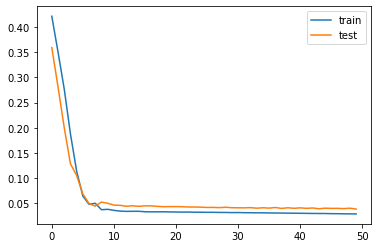

In [27]:
# design network
model = keras.Sequential()
model.add(layers.LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(layers.Dense(9))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(train_X, train_y, epochs=50, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [28]:
yhat = model.predict(test_X)
rmse = sqrt(mean_squared_error(yhat, test_y))
rmse

0.04985211082828233

In [29]:
yhat = pd.DataFrame(yhat, index=fixed_df.index[-3:], columns=fixed_df.columns)
yhat

danceability    energy  loudness      mode  speechiness  \
month_year                                                            
2020-12         0.678870  0.652676  0.794064  0.575990     0.110545   
2021-01         0.689320  0.634182  0.797393  0.577035     0.110155   
2021-02         0.696598  0.622337  0.798134  0.578755     0.108092   

            acousticness  liveness   valence     tempo  
month_year                                              
2020-12         0.177746  0.182557  0.525860  0.424763  
2021-01         0.196147  0.178352  0.532275  0.419919  
2021-02         0.207546  0.176159  0.531054  0.420110

In [30]:
test_y = pd.DataFrame(test_y, index=fixed_df.index[-3:], columns=fixed_df.columns)
test_y

danceability    energy  loudness      mode  speechiness  \
month_year                                                            
2020-12         0.650519  0.595080  0.745870  0.549383     0.103267   
2021-01         0.672920  0.599441  0.760942  0.521277     0.111684   
2021-02         0.683030  0.611791  0.773716  0.492537     0.118903   

            acousticness  liveness   valence     tempo  
month_year                                              
2020-12         0.320473  0.167510  0.573328  0.458979  
2021-01         0.302343  0.143945  0.556306  0.461896  
2021-02         0.281510  0.148919  0.525915  0.441954

In [31]:
print('\nForecast Accuracy of: danceability')
accuracy_prod = forecast_accuracy(yhat['danceability'].values, test_y['danceability'])
for k, v in accuracy_prod.items():
    print(adjust(k), ': ', round(v,4))

print('\nForecast Accuracy of: energy')
accuracy_prod = forecast_accuracy(yhat['energy'].values, test_y['energy'])
for k, v in accuracy_prod.items():
    print(adjust(k), ': ', round(v,4))

print('\nForecast Accuracy of: loudness')
accuracy_prod = forecast_accuracy(yhat['loudness'].values, test_y['loudness'])
for k, v in accuracy_prod.items():
    print(adjust(k), ': ', round(v,4))

print('\nForecast Accuracy of: mode')
accuracy_prod = forecast_accuracy(yhat['mode'].values, test_y['mode'])
for k, v in accuracy_prod.items():
    print(adjust(k), ': ', round(v,4))

print('\nForecast Accuracy of: speechiness')
accuracy_prod = forecast_accuracy(yhat['speechiness'].values, test_y['speechiness'])
for k, v in accuracy_prod.items():
    print(adjust(k), ': ', round(v,4))

print('\nForecast Accuracy of: acousticness')
accuracy_prod = forecast_accuracy(yhat['acousticness'].values, test_y['acousticness'])
for k, v in accuracy_prod.items():
    print(adjust(k), ': ', round(v,4))

print('\nForecast Accuracy of: liveness')
accuracy_prod = forecast_accuracy(yhat['liveness'].values, test_y['liveness'])
for k, v in accuracy_prod.items():
    print(adjust(k), ': ', round(v,4))
    
print('\nForecast Accuracy of: valence')
accuracy_prod = forecast_accuracy(yhat['valence'].values, test_y['valence'])
for k, v in accuracy_prod.items():
    print(adjust(k), ': ', round(v,4))    

    
print('\nForecast Accuracy of: tempo')
accuracy_prod = forecast_accuracy(yhat['tempo'].values, test_y['tempo'])
for k, v in accuracy_prod.items():
    print(adjust(k), ': ', round(v,4))


Forecast Accuracy of: danceability
rmse   :  0.0205
corr   :  0.9937

Forecast Accuracy of: energy
rmse   :  0.0393
corr   :  -0.9229

Forecast Accuracy of: loudness
rmse   :  0.0376
corr   :  0.9541

Forecast Accuracy of: mode
rmse   :  0.0612
corr   :  -0.9911

Forecast Accuracy of: speechiness
rmse   :  0.0076
corr   :  -0.9134

Forecast Accuracy of: acousticness
rmse   :  0.1112
corr   :  -0.9848

Forecast Accuracy of: liveness
rmse   :  0.0268
corr   :  0.8549

Forecast Accuracy of: valence
rmse   :  0.0309
corr   :  -0.6485

Forecast Accuracy of: tempo
rmse   :  0.0337
corr   :  0.3457


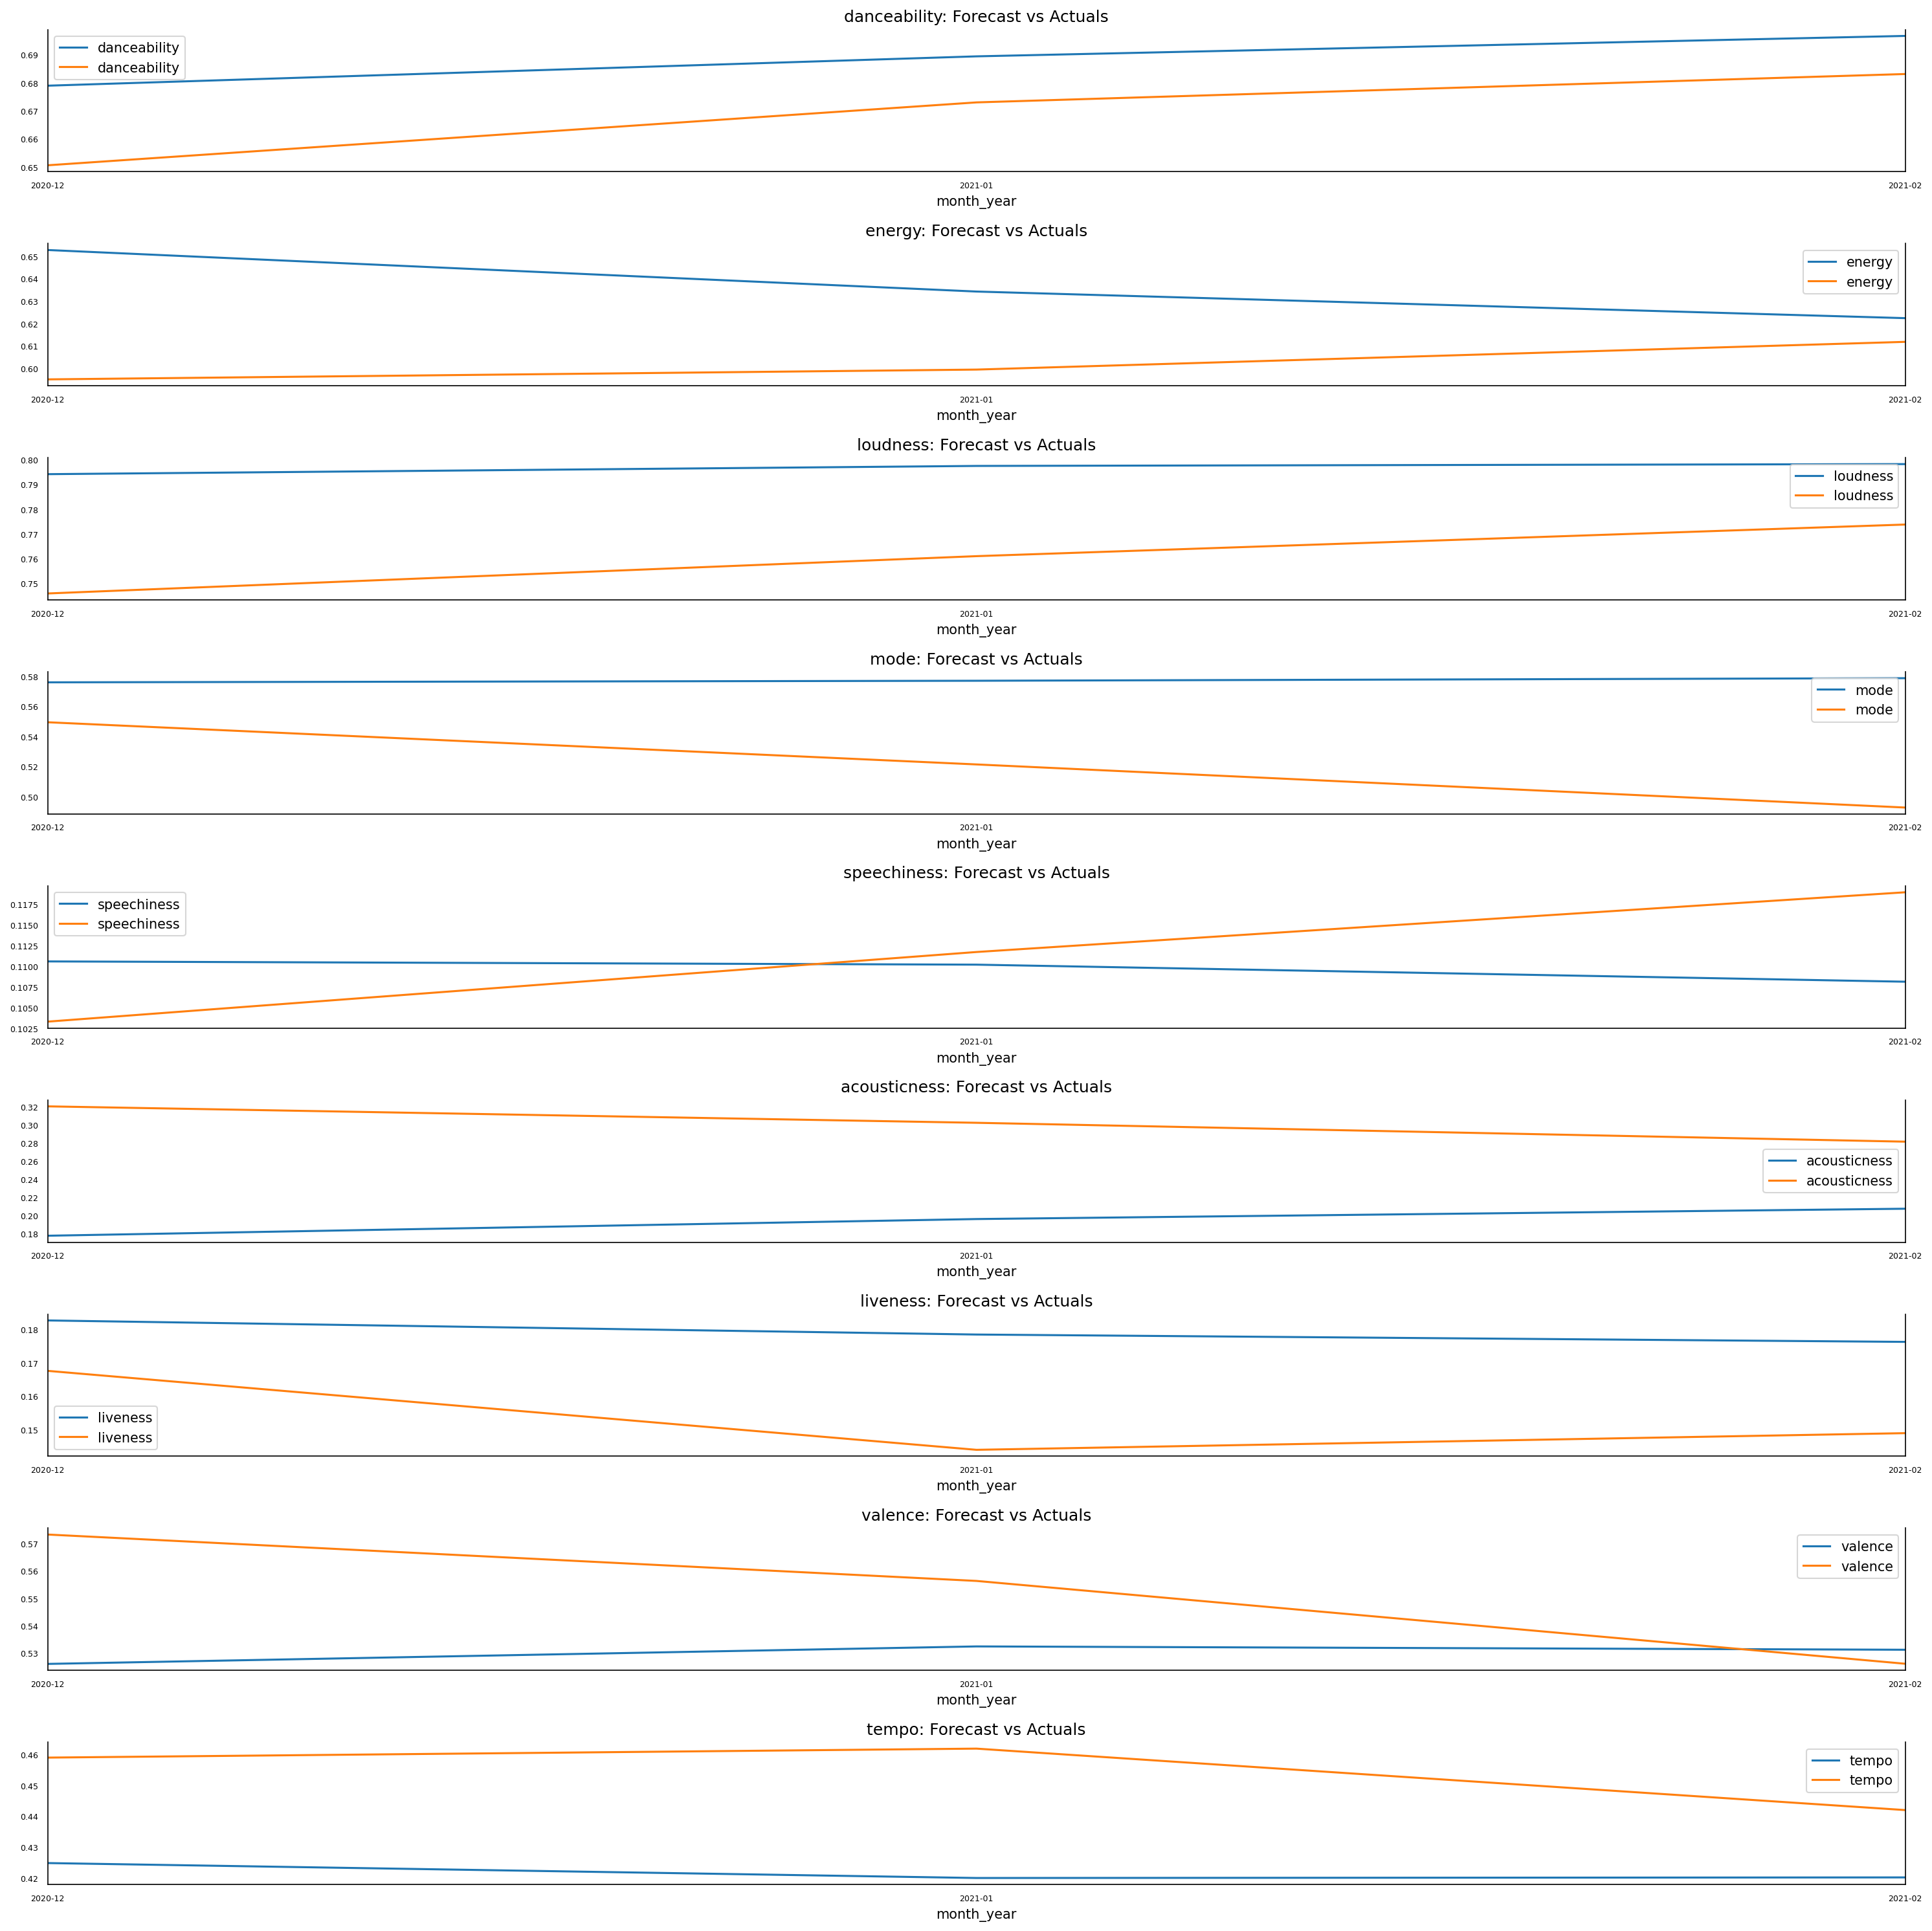

In [32]:
fig, axes = plt.subplots(nrows=int(len(fixed_df.columns)/1), ncols=1, dpi=150, figsize=(20,20))
for i, (col,ax) in enumerate(zip(fixed_df.columns, axes.flatten())):
    yhat[col].plot(legend=True, ax=ax).autoscale(axis='x',tight=True)
    test_y[col][-4:].plot(legend=True, ax=ax);
    ax.set_title(col + ": Forecast vs Actuals")
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

### future forecasts

In [33]:
new_model = keras.Sequential()
new_model.add(layers.LSTM(50, stateful=True, batch_input_shape=(1,train_X.shape[1], train_X.shape[2])))
new_model.add(layers.Dense(9))
new_model.compile(loss='mae', optimizer='adam')
new_model.set_weights(model.get_weights())
new_model.reset_states()
df_lstm_results_f = pd.DataFrame()
data = fixed_df.copy()

for time in range(3):
    values = data.values
    reframed = series_to_supervised(values, 3, 1)
    ref_values = reframed.values
    t = ref_values[-1:, -9:]
    t = t.reshape((1, 1, 9))
    prediction = new_model.predict([t])
    p = pd.DataFrame(prediction, columns = data.columns )
    data = pd.concat([data, p])
    df_lstm_results_f = pd.concat([df_lstm_results_f, p])

df_lstm_results_f.columns = data.columns
data

danceability    energy  loudness      mode  speechiness  \
1990-01      0.630260  0.665077  0.688201  0.650888     0.055056   
1990-02      0.645926  0.666276  0.692767  0.736196     0.057111   
1990-03      0.650222  0.652237  0.682651  0.762887     0.056255   
1990-04      0.630709  0.669716  0.690572  0.738806     0.053413   
1990-05      0.637906  0.661852  0.696228  0.710938     0.060371   
...               ...       ...       ...       ...          ...   
2021-01      0.672920  0.599441  0.760942  0.521277     0.111684   
2021-02      0.683030  0.611791  0.773716  0.492537     0.118903   
0            0.247958  0.208254  0.285568  0.233374     0.040033   
0            0.344347  0.304484  0.377678  0.292834     0.053571   
0            0.456213  0.413499  0.504034  0.365627     0.068200   

         acousticness  liveness   valence     tempo  
1990-01      0.165226  0.162822  0.586083  0.412984  
1990-02      0.163809  0.171035  0.597663  0.417995  
1990-03      0.161965  0.159654  0.571773  0.406299  
1990-04      0.159603  0.158996  0.600575  0.430845  
1990-05      0.174774  0.172884  0.600820  0.407230  
...               ...       ...       ...       ...  
2021-01      0.302343  0.143945  0.556306  0.461896  
2021-02      0.281510  0.148919  0.525915  0.441954  
0            0.085039  0.044079  0.203359  0.145917  
0            0.091054  0.101098  0.259631  0.211389  
0            0.120273  0.148434  0.343051  0.290127  

[377 rows x 9 columns]

In [34]:
import datetime as dt

In [35]:
month = fixed_df.iloc[-1:].index
month = pd.to_datetime(month, format='%Y-%m')
month = month.strftime("%Y-%m")
rng = pd.date_range(start = month.values[0], periods=4, freq='M')
df_lstm_results_f.index = rng[1:]
df_lstm_results_f.index = df_lstm_results_f.index.to_series().apply(lambda x: dt.datetime.strftime(x,'%Y-%m'))
df_lstm_results_f

danceability    energy  loudness      mode  speechiness  \
2021-03      0.247958  0.208254  0.285568  0.233374     0.040033   
2021-04      0.344347  0.304484  0.377678  0.292834     0.053571   
2021-05      0.456213  0.413499  0.504034  0.365627     0.068200   

         acousticness  liveness   valence     tempo  
2021-03      0.085039  0.044079  0.203359  0.145917  
2021-04      0.091054  0.101098  0.259631  0.211389  
2021-05      0.120273  0.148434  0.343051  0.290127

# var model

In [36]:
from statsmodels.tsa.api import VAR

In [37]:
test = fixed_df.copy()
nobs = 3
df_train, df_test = test[0:-nobs], test[-nobs:]

# Check size
print(df_train.shape)
print(df_test.shape)

(371, 9)
(3, 9)


In [38]:
df_differenced = df_train.diff().dropna()

In [39]:
model = VAR(df_differenced)
model_fitted = model.fit(3)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [40]:
forecast_input = df_differenced.values[-3:]
forecast_input

array([[-0.01362179,  0.00632846,  0.00234373, -0.0106095 ,  0.00883556,
        -0.01240212, -0.0133332 , -0.03331154,  0.00387739],
       [ 0.0020968 ,  0.02291574, -0.00128589, -0.04920576,  0.00394478,
        -0.02839714, -0.01707254, -0.01078637,  0.03511967],
       [-0.00730882,  0.01342044,  0.00270026, -0.04638009,  0.00376497,
         0.00062177,  0.0021037 ,  0.00336018,  0.01339369]])

In [41]:
fc = model_fitted.forecast(y=forecast_input, steps=nobs)
df_forecast = pd.DataFrame(fc, index=test.index[-nobs:], columns=test.columns + '_1d')
df_forecast

danceability_1d  energy_1d  loudness_1d   mode_1d  speechiness_1d  \
month_year                                                                      
2020-12           -0.001850  -0.000492     0.000615  0.024053       -0.002688   
2021-01           -0.000439   0.003081     0.004815  0.054147        0.000893   
2021-02            0.001976  -0.000989     0.002139  0.024593        0.001398   

            acousticness_1d  liveness_1d  valence_1d  tempo_1d  
month_year                                                      
2020-12            0.003068     0.006284    0.008588  0.001613  
2021-01           -0.003067     0.006460    0.010582 -0.005091  
2021-02           -0.004041     0.000896    0.003666 -0.000958

In [42]:
def invert_transformation(df_train, df_forecast):
    """Revert back the differencing to get the forecast to original scale."""
    df_fc = df_forecast.copy()
    columns = df_train.columns
    for col in columns:        
        df_fc[str(col)+'_forecast'] = df_train[col].iloc[-1] + df_fc[str(col)+'_1d'].cumsum()
    return df_fc

In [43]:
df_results = invert_transformation(df_train, df_forecast)        

In [44]:
df_results

danceability_1d  energy_1d  loudness_1d   mode_1d  speechiness_1d  \
month_year                                                                      
2020-12           -0.001850  -0.000492     0.000615  0.024053       -0.002688   
2021-01           -0.000439   0.003081     0.004815  0.054147        0.000893   
2021-02            0.001976  -0.000989     0.002139  0.024593        0.001398   

            acousticness_1d  liveness_1d  valence_1d  tempo_1d  \
month_year                                                       
2020-12            0.003068     0.006284    0.008588  0.001613   
2021-01           -0.003067     0.006460    0.010582 -0.005091   
2021-02           -0.004041     0.000896    0.003666 -0.000958   

            danceability_forecast  energy_forecast  loudness_forecast  \
month_year                                                              
2020-12                  0.684900         0.666566           0.793577   
2021-01                  0.684461         0.669647           0.798392   
2021-02                  0.686436         0.668657           0.800530   

            mode_forecast  speechiness_forecast  acousticness_forecast  \
month_year                                                               
2020-12          0.472771              0.131932               0.176908   
2021-01          0.526918              0.132825               0.173841   
2021-02          0.551511              0.134223               0.169800   

            liveness_forecast  valence_forecast  tempo_forecast  
month_year                                                       
2020-12              0.181246          0.492169        0.474315  
2021-01              0.187706          0.502751        0.469224  
2021-02              0.188601          0.506416        0.468266

In [45]:
df_results = df_results.loc[:, [ 'danceability_forecast', 'energy_forecast', 'loudness_forecast',
       'mode_forecast', 'speechiness_forecast', 'acousticness_forecast',
       'liveness_forecast', 'valence_forecast', 'tempo_forecast']]

In [46]:
df_results

danceability_forecast  energy_forecast  loudness_forecast  \
month_year                                                              
2020-12                  0.684900         0.666566           0.793577   
2021-01                  0.684461         0.669647           0.798392   
2021-02                  0.686436         0.668657           0.800530   

            mode_forecast  speechiness_forecast  acousticness_forecast  \
month_year                                                               
2020-12          0.472771              0.131932               0.176908   
2021-01          0.526918              0.132825               0.173841   
2021-02          0.551511              0.134223               0.169800   

            liveness_forecast  valence_forecast  tempo_forecast  
month_year                                                       
2020-12              0.181246          0.492169        0.474315  
2021-01              0.187706          0.502751        0.469224  
2021-02              0.188601          0.506416        0.468266

In [47]:
df_test

danceability    energy  loudness      mode  speechiness  \
month_year                                                            
2020-12         0.650519  0.595080  0.745870  0.549383     0.103267   
2021-01         0.672920  0.599441  0.760942  0.521277     0.111684   
2021-02         0.683030  0.611791  0.773716  0.492537     0.118903   

            acousticness  liveness   valence     tempo  
month_year                                              
2020-12         0.320473  0.167510  0.573328  0.458979  
2021-01         0.302343  0.143945  0.556306  0.461896  
2021-02         0.281510  0.148919  0.525915  0.441954

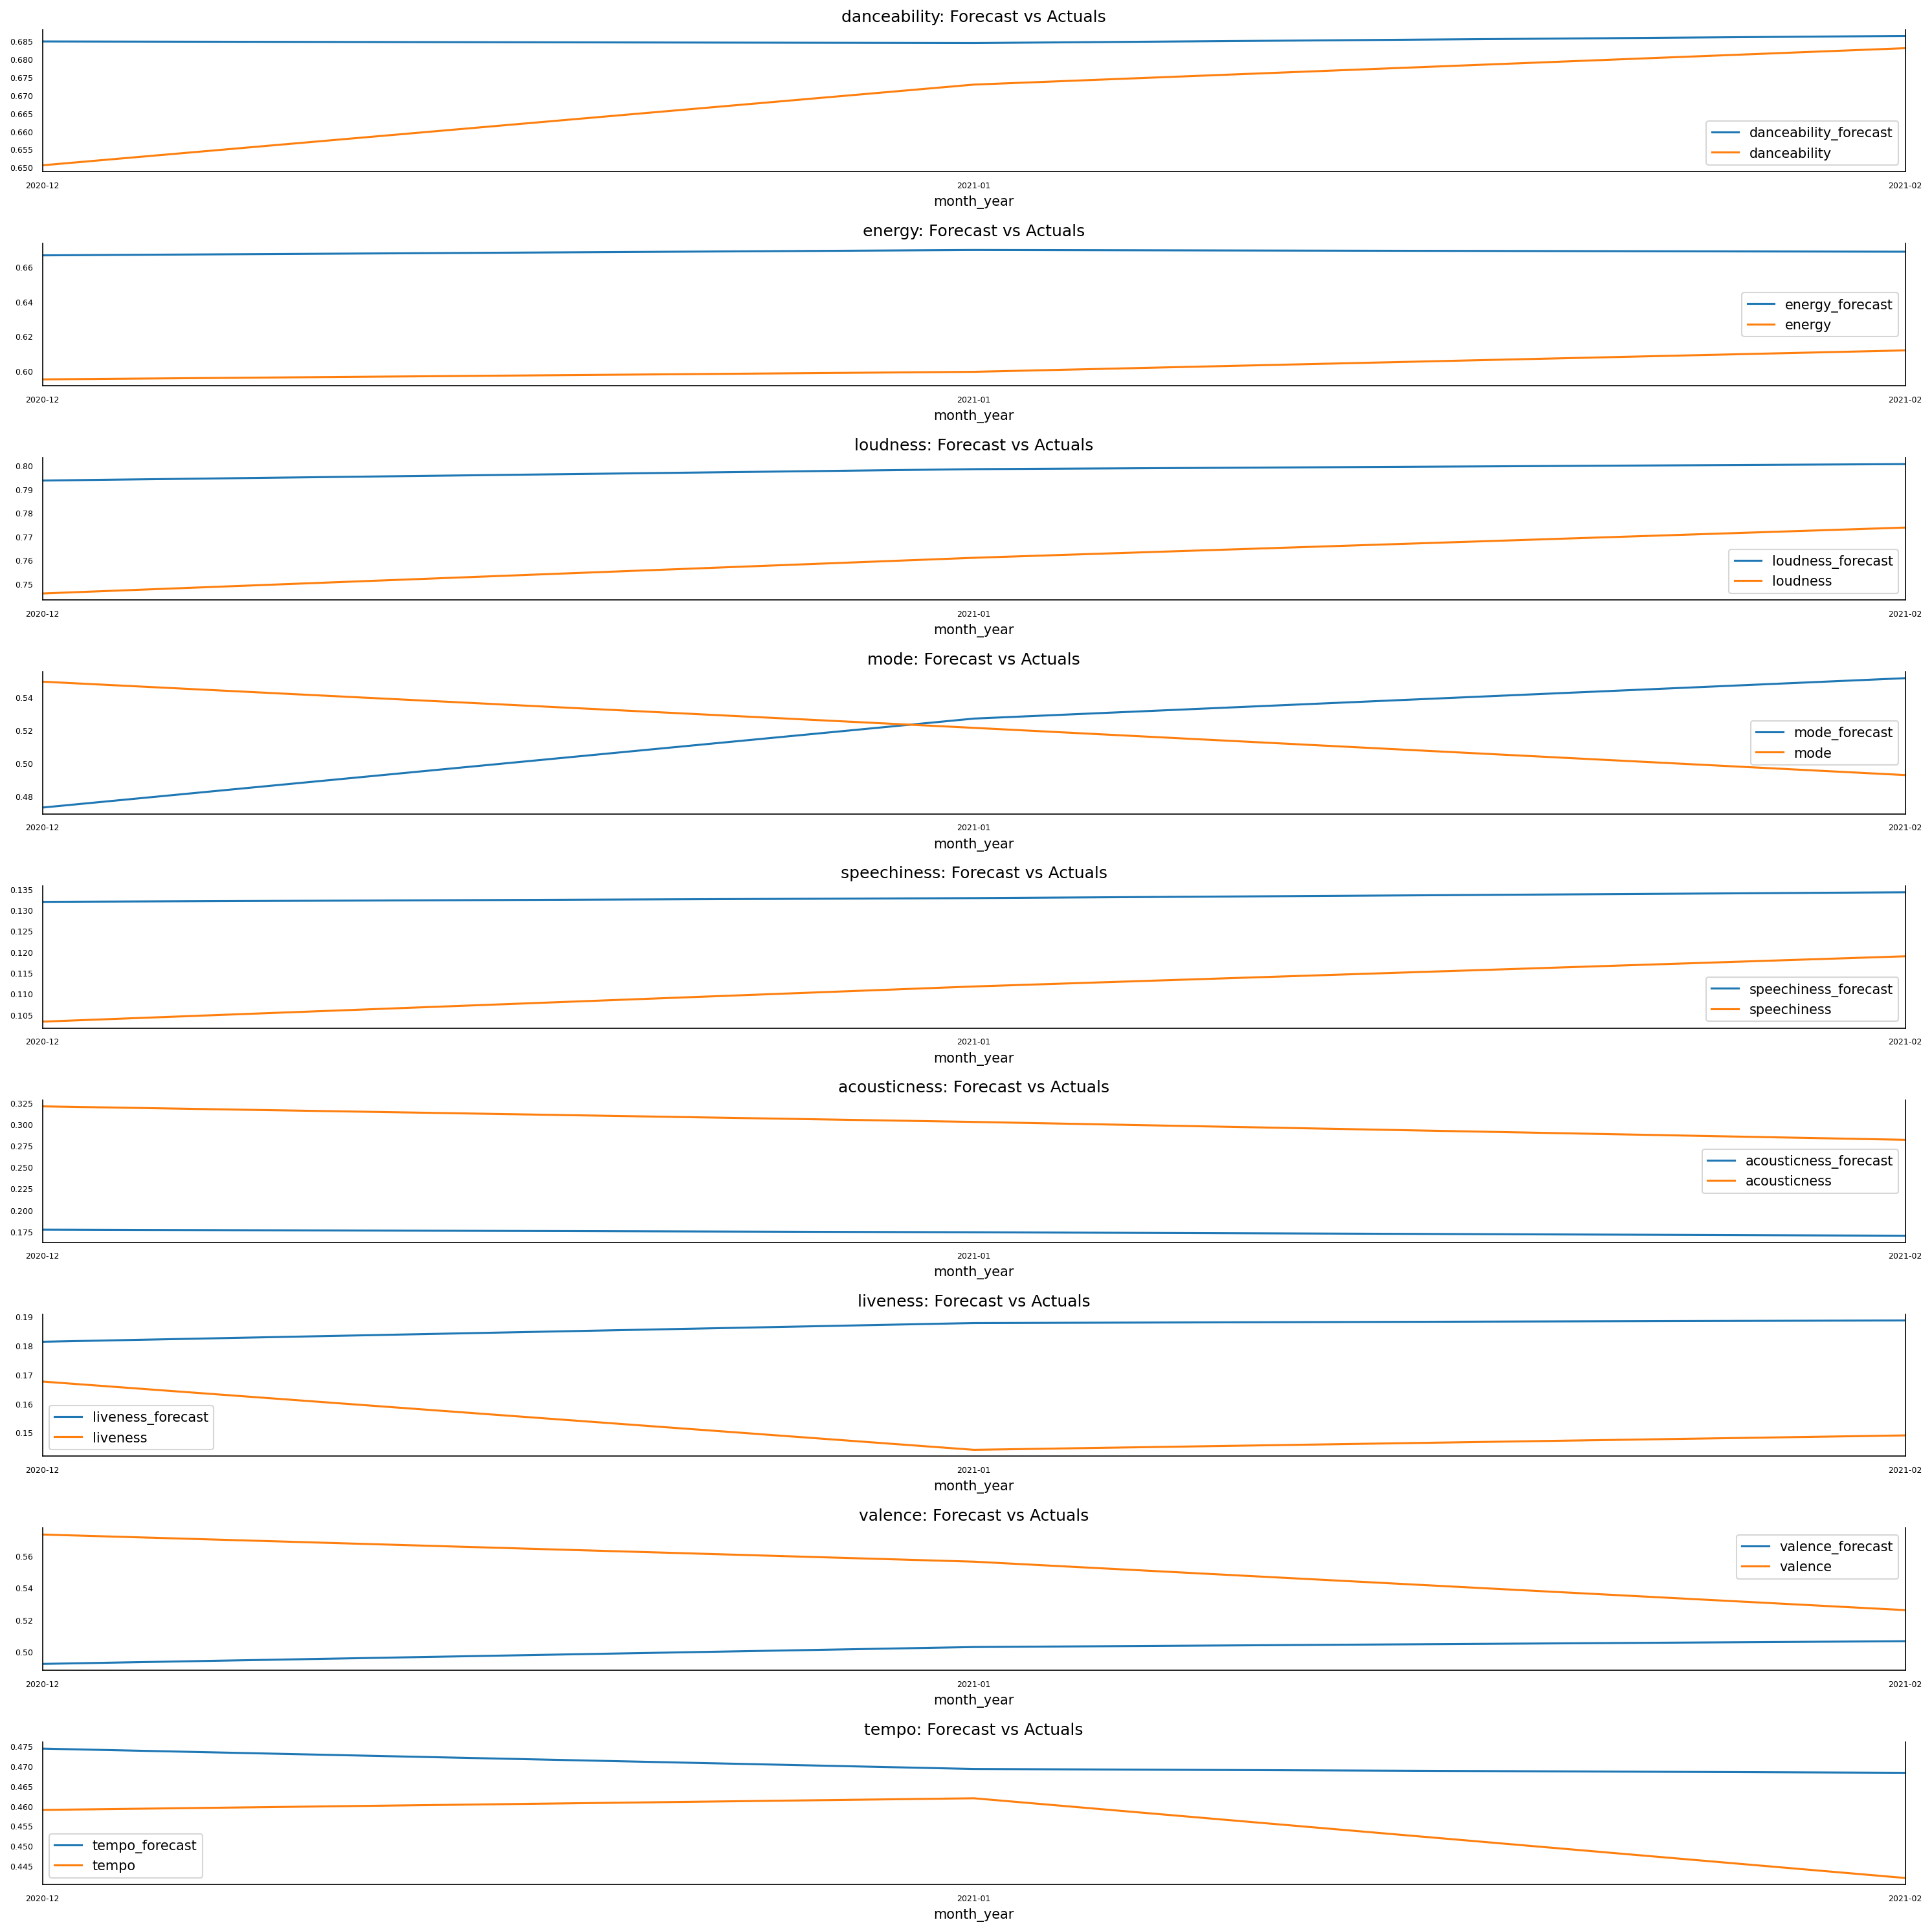

In [48]:
fig, axes = plt.subplots(nrows=int(len(test.columns)/1), ncols=1, dpi=150, figsize=(20,20))
for i, (col,ax) in enumerate(zip(test.columns, axes.flatten())):
    df_results[col+'_forecast'].plot(legend=True, ax=ax).autoscale(axis='x',tight=True)
    df_test[col][-nobs:].plot(legend=True, ax=ax);
    ax.set_title(col + ": Forecast vs Actuals")
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

In [49]:
print('\nForecast Accuracy of: danceability')
accuracy_prod = forecast_accuracy(df_results['danceability_forecast'], df_test['danceability'])
for k, v in accuracy_prod.items():
    print(adjust(k), ': ', round(v,4))

print('\nForecast Accuracy of: energy')
accuracy_prod = forecast_accuracy(df_results['energy_forecast'], df_test['energy'])
for k, v in accuracy_prod.items():
    print(adjust(k), ': ', round(v,4))

print('\nForecast Accuracy of: loudness')
accuracy_prod = forecast_accuracy(df_results['loudness_forecast'], df_test['loudness'])
for k, v in accuracy_prod.items():
    print(adjust(k), ': ', round(v,4))

print('\nForecast Accuracy of: mode')
accuracy_prod = forecast_accuracy(df_results['mode_forecast'], df_test['mode'])
for k, v in accuracy_prod.items():
    print(adjust(k), ': ', round(v,4))

print('\nForecast Accuracy of: speechiness')
accuracy_prod = forecast_accuracy(df_results['speechiness_forecast'], df_test['speechiness'])
for k, v in accuracy_prod.items():
    print(adjust(k), ': ', round(v,4))

print('\nForecast Accuracy of: acousticness')
accuracy_prod = forecast_accuracy(df_results['acousticness_forecast'], df_test['acousticness'])
for k, v in accuracy_prod.items():
    print(adjust(k), ': ', round(v,4))

print('\nForecast Accuracy of: liveness')
accuracy_prod = forecast_accuracy(df_results['liveness_forecast'], df_test['liveness'])
for k, v in accuracy_prod.items():
    print(adjust(k), ': ', round(v,4))
    
print('\nForecast Accuracy of: valence')
accuracy_prod = forecast_accuracy(df_results['valence_forecast'], df_test['valence'])
for k, v in accuracy_prod.items():
    print(adjust(k), ': ', round(v,4))    

    
print('\nForecast Accuracy of: tempo')
accuracy_prod = forecast_accuracy(df_results['tempo_forecast'], df_test['tempo'])
for k, v in accuracy_prod.items():
    print(adjust(k), ': ', round(v,4))


Forecast Accuracy of: danceability
rmse   :  0.021
corr   :  0.5804

Forecast Accuracy of: energy
rmse   :  0.0665
corr   :  0.4422

Forecast Accuracy of: loudness
rmse   :  0.0383
corr   :  0.9854

Forecast Accuracy of: mode
rmse   :  0.0559
corr   :  -0.9759

Forecast Accuracy of: speechiness
rmse   :  0.0224
corr   :  0.9854

Forecast Accuracy of: acousticness
rmse   :  0.1286
corr   :  0.9992

Forecast Accuracy of: liveness
rmse   :  0.035
corr   :  -0.9513

Forecast Accuracy of: valence
rmse   :  0.0573
corr   :  -0.907

Forecast Accuracy of: tempo
rmse   :  0.0181
corr   :  0.5104


In [50]:
df_results.columns = ['danceability', 'energy', 'loudness','mode', 'speechiness', 'acousticness','liveness', 'valence', 'tempo']
features = ['danceability', 'energy', 'loudness','mode', 'speechiness', 'acousticness','liveness', 'valence', 'tempo']

In [51]:
prediction_df = pd.DataFrame()

In [52]:
def rmse_func(forecast, actual):
    return np.mean((forecast - actual)**2)**.5

In [53]:
for feature in features:
    if rmse_func(df_results[feature], df_test[feature]) < rmse_func(yhat[feature], test_y[feature]):
        prediction_df[feature] = df_results[feature] 
    else:
        prediction_df[feature] = yhat[feature]
prediction_df    
        
    

danceability    energy  loudness      mode  speechiness  \
month_year                                                            
2020-12         0.678870  0.652676  0.794064  0.472771     0.110545   
2021-01         0.689320  0.634182  0.797393  0.526918     0.110155   
2021-02         0.696598  0.622337  0.798134  0.551511     0.108092   

            acousticness  liveness   valence     tempo  
month_year                                              
2020-12         0.177746  0.182557  0.525860  0.474315  
2021-01         0.196147  0.178352  0.532275  0.469224  
2021-02         0.207546  0.176159  0.531054  0.468266

In [54]:
rmse = sqrt(mean_squared_error(prediction_df, test_y))
rmse

0.048228248019952874

## ARIMA on each feature

In [55]:
from statsmodels.tsa.arima.model import ARIMA
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)


danceability:
predicted=0.688463, expected=0.650519
predicted=0.644571, expected=0.672920
predicted=0.682437, expected=0.683030
danceability - Test RMSE: 0.027


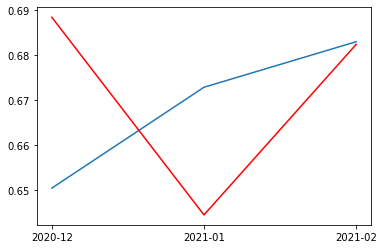


energy:
predicted=0.667300, expected=0.595080
predicted=0.580218, expected=0.599441
predicted=0.603806, expected=0.611791
energy - Test RMSE: 0.043


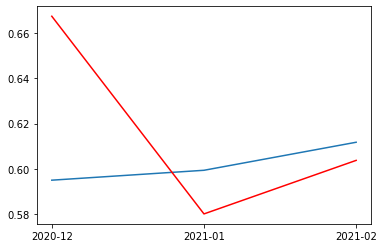


loudness:
predicted=0.793107, expected=0.745870
predicted=0.740088, expected=0.760942
predicted=0.763631, expected=0.773716
loudness - Test RMSE: 0.030


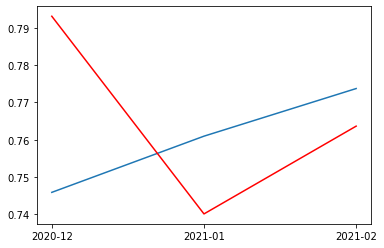


mode:
predicted=0.446859, expected=0.549383
predicted=0.590507, expected=0.521277
predicted=0.510363, expected=0.492537
mode - Test RMSE: 0.072


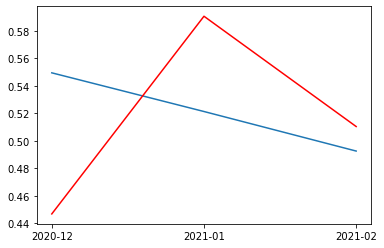


speechiness:
predicted=0.133235, expected=0.103267
predicted=0.101501, expected=0.111684
predicted=0.111291, expected=0.118903
speechiness - Test RMSE: 0.019


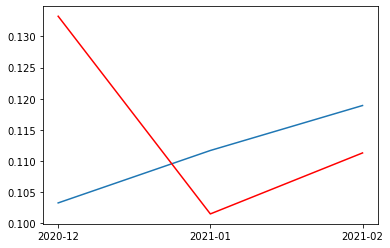


acousticness:
predicted=0.178136, expected=0.320473
predicted=0.353604, expected=0.302343
predicted=0.284147, expected=0.281510
acousticness - Test RMSE: 0.087


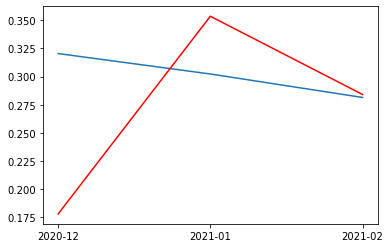


liveness:
predicted=0.179458, expected=0.167510
predicted=0.171191, expected=0.143945
predicted=0.142773, expected=0.148919
liveness - Test RMSE: 0.018


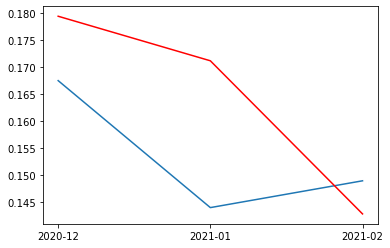


valence:
predicted=0.491446, expected=0.573328
predicted=0.598426, expected=0.556306
predicted=0.543390, expected=0.525915
valence - Test RMSE: 0.054


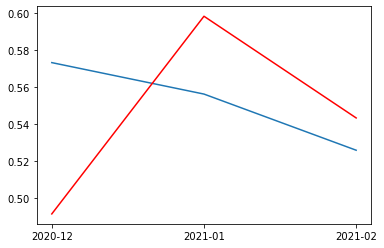


tempo:
predicted=0.469278, expected=0.458979
predicted=0.448887, expected=0.461896
predicted=0.461191, expected=0.441954
tempo - Test RMSE: 0.015


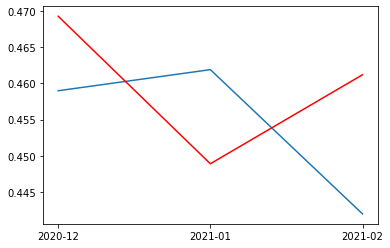

In [56]:
features = ['danceability', 'energy', 'loudness','mode', 'speechiness', 'acousticness','liveness', 'valence', 'tempo']
arima_predictions = pd.DataFrame()
arima_actual = fixed_df[-nobs:]
for feature in features:    
    print("\n" + feature + ":")
    test_arima = fixed_df[feature]
    nobs = 3
    df_train_arima, df_test_arima = test_arima[0:-nobs], test_arima[-nobs:]
    df_differenced = df_train_arima.values
    history = [x for x in df_train_arima]
    predictions = list()
    # walk-forward validation
    for t in range(len(df_test_arima)):
        model = ARIMA(history, order=(3,1,0))
        model_fit = model.fit()
        output = model_fit.forecast()
        y_hat = output[0]
        predictions.append(y_hat)
        obs = df_test_arima[t]
        history.append(obs)
        print('predicted=%f, expected=%f' % (y_hat, obs))
    # evaluate forecasts
    arima_predictions[feature] = predictions
    rmse = sqrt(mean_squared_error(df_test_arima, predictions))
    print(feature +' - Test RMSE: %.3f' % rmse)
    # plot forecasts against actual outcomes
    pyplot.plot(df_test_arima)
    pyplot.plot(predictions, color='red')
    pyplot.show()

In [57]:
arima_predictions

danceability    energy  loudness      mode  speechiness  acousticness  \
0      0.688463  0.667300  0.793107  0.446859     0.133235      0.178136   
1      0.644571  0.580218  0.740088  0.590507     0.101501      0.353604   
2      0.682437  0.603806  0.763631  0.510363     0.111291      0.284147   

   liveness   valence     tempo  
0  0.179458  0.491446  0.469278  
1  0.171191  0.598426  0.448887  
2  0.142773  0.543390  0.461191

In [58]:
arima_actual

danceability    energy  loudness      mode  speechiness  \
month_year                                                            
2020-12         0.650519  0.595080  0.745870  0.549383     0.103267   
2021-01         0.672920  0.599441  0.760942  0.521277     0.111684   
2021-02         0.683030  0.611791  0.773716  0.492537     0.118903   

            acousticness  liveness   valence     tempo  
month_year                                              
2020-12         0.320473  0.167510  0.573328  0.458979  
2021-01         0.302343  0.143945  0.556306  0.461896  
2021-02         0.281510  0.148919  0.525915  0.441954

In [59]:
rmse = sqrt(mean_squared_error(arima_predictions, arima_actual))

In [60]:
rmse

0.04737132582175278

In [61]:
print('\nForecast Accuracy of: danceability')
accuracy_prod = forecast_accuracy(arima_predictions['danceability'], arima_actual['danceability'])
for k, v in accuracy_prod.items():
    print(adjust(k), ': ', round(v,4))

print('\nForecast Accuracy of: energy')
accuracy_prod = forecast_accuracy(arima_predictions['energy'], arima_actual['energy'])
for k, v in accuracy_prod.items():
    print(adjust(k), ': ', round(v,4))

print('\nForecast Accuracy of: loudness')
accuracy_prod = forecast_accuracy(arima_predictions['loudness'], arima_actual['loudness'])
for k, v in accuracy_prod.items():
    print(adjust(k), ': ', round(v,4))

print('\nForecast Accuracy of: mode')
accuracy_prod = forecast_accuracy(arima_predictions['mode'], arima_actual['mode'])
for k, v in accuracy_prod.items():
    print(adjust(k), ': ', round(v,4))

print('\nForecast Accuracy of: speechiness')
accuracy_prod = forecast_accuracy(arima_predictions['speechiness'], arima_actual['speechiness'])
for k, v in accuracy_prod.items():
    print(adjust(k), ': ', round(v,4))

print('\nForecast Accuracy of: acousticness')
accuracy_prod = forecast_accuracy(arima_predictions['acousticness'], arima_actual['acousticness'])
for k, v in accuracy_prod.items():
    print(adjust(k), ': ', round(v,4))

print('\nForecast Accuracy of: liveness')
accuracy_prod = forecast_accuracy(arima_predictions['liveness'], arima_actual['liveness'])
for k, v in accuracy_prod.items():
    print(adjust(k), ': ', round(v,4))
    
print('\nForecast Accuracy of: valence')
accuracy_prod = forecast_accuracy(arima_predictions['valence'], arima_actual['valence'])
for k, v in accuracy_prod.items():
    print(adjust(k), ': ', round(v,4))    

    
print('\nForecast Accuracy of: tempo')
accuracy_prod = forecast_accuracy(arima_predictions['tempo'], arima_actual['tempo'])
for k, v in accuracy_prod.items():
    print(adjust(k), ': ', round(v,4))


Forecast Accuracy of: danceability
rmse   :  nan
corr   :  -0.3353

Forecast Accuracy of: energy
rmse   :  nan
corr   :  -0.4908

Forecast Accuracy of: loudness
rmse   :  nan
corr   :  -0.5938

Forecast Accuracy of: mode
rmse   :  nan
corr   :  -0.4353

Forecast Accuracy of: speechiness
rmse   :  nan
corr   :  -0.7071

Forecast Accuracy of: acousticness
rmse   :  nan
corr   :  -0.5673

Forecast Accuracy of: liveness
rmse   :  nan
corr   :  0.5128

Forecast Accuracy of: valence
rmse   :  nan
corr   :  -0.3387

Forecast Accuracy of: tempo
rmse   :  nan
corr   :  -0.2519


In [62]:
arima_predictions.index = fixed_df.index[-nobs:]
arima_predictions

danceability    energy  loudness      mode  speechiness  \
month_year                                                            
2020-12         0.688463  0.667300  0.793107  0.446859     0.133235   
2021-01         0.644571  0.580218  0.740088  0.590507     0.101501   
2021-02         0.682437  0.603806  0.763631  0.510363     0.111291   

            acousticness  liveness   valence     tempo  
month_year                                              
2020-12         0.178136  0.179458  0.491446  0.469278  
2021-01         0.353604  0.171191  0.598426  0.448887  
2021-02         0.284147  0.142773  0.543390  0.461191

In [63]:
arima_actual

danceability    energy  loudness      mode  speechiness  \
month_year                                                            
2020-12         0.650519  0.595080  0.745870  0.549383     0.103267   
2021-01         0.672920  0.599441  0.760942  0.521277     0.111684   
2021-02         0.683030  0.611791  0.773716  0.492537     0.118903   

            acousticness  liveness   valence     tempo  
month_year                                              
2020-12         0.320473  0.167510  0.573328  0.458979  
2021-01         0.302343  0.143945  0.556306  0.461896  
2021-02         0.281510  0.148919  0.525915  0.441954

### select predictions by : Taking forecats of each feature from the optimal model for it 

In [64]:
features = ['danceability', 'energy', 'loudness','mode', 'speechiness', 'acousticness','liveness', 'valence', 'tempo']
def best_rmse(results,actual):
    var_rmse = rmse_func(results[0], actual)
    lstm_rmse = rmse_func(results[1], actual)
    arima_rmse = rmse_func(results[2], actual)
    rmse_values = [var_rmse, lstm_rmse, arima_rmse]
    return results[rmse_values.index(min(rmse_values))]

final_prediction_df = pd.DataFrame()
for feature in features:
    values = [df_results[feature], yhat[feature], arima_predictions[feature]]
    final_prediction_df[feature] = best_rmse(values,df_test[feature])

final_prediction_df    

danceability    energy  loudness      mode  speechiness  \
month_year                                                            
2020-12         0.678870  0.652676  0.793107  0.472771     0.110545   
2021-01         0.689320  0.634182  0.740088  0.526918     0.110155   
2021-02         0.696598  0.622337  0.763631  0.551511     0.108092   

            acousticness  liveness   valence     tempo  
month_year                                              
2020-12         0.178136  0.179458  0.525860  0.469278  
2021-01         0.353604  0.171191  0.532275  0.448887  
2021-02         0.284147  0.142773  0.531054  0.461191

In [65]:
arima_actual

danceability    energy  loudness      mode  speechiness  \
month_year                                                            
2020-12         0.650519  0.595080  0.745870  0.549383     0.103267   
2021-01         0.672920  0.599441  0.760942  0.521277     0.111684   
2021-02         0.683030  0.611791  0.773716  0.492537     0.118903   

            acousticness  liveness   valence     tempo  
month_year                                              
2020-12         0.320473  0.167510  0.573328  0.458979  
2021-01         0.302343  0.143945  0.556306  0.461896  
2021-02         0.281510  0.148919  0.525915  0.441954

In [66]:
rmse = sqrt(mean_squared_error(final_prediction_df, arima_actual))
rmse

0.04106514983916529